In [94]:
import numpy as np
import pandas as pd
from pandas import Series ,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data=pd.read_csv('zomato_indore.csv')

In [96]:
data.head()

,Unnamed: 0,name,locality,latitude,longitude,cuisines,average_cost_for_two,aggregate_rating,votes,rating_text
0,0,Namo Sandwich,Sudama Nagar,22.696331,75.834857,Fast Food,500,4.3,860,Very Good
1,1,Bake N Shake,"BCM Heights, Vijay Nagar",22.755705,75.895287,"Cafe, Fast Food, Bakery",500,4.2,683,Very Good
2,2,Shree Gurukripa,Sarwate Bus Stand,22.714090,75.868851,North Indian,350,4.3,2030,Very Good
3,3,Nafees Restaurant,Old Palasia,22.725712,75.887757,"North Indian, Mughlai",800,4.3,2987,Very Good
4,4,Hotel Guru Kripa,Sarwate Bus Stand,22.714086,75.868846,North Indian,350,4.3,3441,Very Good


# Analazing the Data

In [97]:
data.shape

(2851, 10)

In [98]:
data.columns

Index(['Unnamed: 0', 'name', 'locality', 'latitude', 'longitude', 'cuisines',
       'average_cost_for_two', 'aggregate_rating', 'votes', 'rating_text'],
      dtype='object')

In [99]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [100]:
data

,name,locality,latitude,longitude,cuisines,average_cost_for_two,aggregate_rating,votes,rating_text
0,Namo Sandwich,Sudama Nagar,22.696331,75.834857,Fast Food,500,4.3,860,Very Good
1,Bake N Shake,"BCM Heights, Vijay Nagar",22.755705,75.895287,"Cafe, Fast Food, Bakery",500,4.2,683,Very Good
2,Shree Gurukripa,Sarwate Bus Stand,22.714090,75.868851,North Indian,350,4.3,2030,Very Good
3,Nafees Restaurant,Old Palasia,22.725712,75.887757,"North Indian, Mughlai",800,4.3,2987,Very Good
4,Hotel Guru Kripa,Sarwate Bus Stand,22.714086,75.868846,North Indian,350,4.3,3441,Very Good
...,...,...,...,...,...,...,...,...,...
2846,One Asia - Indore Marriott Hotel,"Indore Marriott Hotel, Vijay Nagar",22.752747,75.883751,"Chinese, Asian",2000,4.5,320,Terbaik
2847,Constellation - Hotel WOW,"Hotel Wow, Vijay Nagar",22.749182,75.895365,"North Indian, Asian, Italian",1800,4.2,285,Very Good
2848,Ni Hao - Radisson Blu Hotel,"Radisson Blu Hotel, Vijay Nagar",22.750030,75.903471,"Asian, Chinese, Momos",1850,4.6,248,Terbaik
2849,Indiya Oye - Radisson Blu Hotel,"Radisson Blu Hotel, Vijay Nagar",22.750035,75.903480,"North Indian, Kashmiri",1850,4.3,200,Sangat Baik


In [101]:
data.describe()

,latitude,longitude,average_cost_for_two,aggregate_rating,votes
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,22.725029,75.878998,655.866363,3.887759,512.119256
std,0.029429,0.029798,478.290545,0.518230,547.966306
min,22.598015,75.000000,50.000000,2.100000,4.000000
25%,22.713932,75.868587,300.000000,3.600000,99.500000
50%,22.725682,75.885655,500.000000,4.000000,412.000000
75%,22.750034,75.894870,800.000000,4.300000,692.000000
max,22.801616,75.938489,2600.000000,4.900000,3441.000000


In [102]:
data.dtypes

name                     object
locality                 object
latitude                float64
longitude               float64
cuisines                 object
average_cost_for_two      int64
aggregate_rating        float64
votes                     int64
rating_text              object
dtype: object

# Checking for null Values

In [103]:
data.isna().sum()

name                    0
locality                0
latitude                0
longitude               0
cuisines                0
average_cost_for_two    0
aggregate_rating        0
votes                   0
rating_text             0
dtype: int64

# Outlier Handling

<AxesSubplot:>

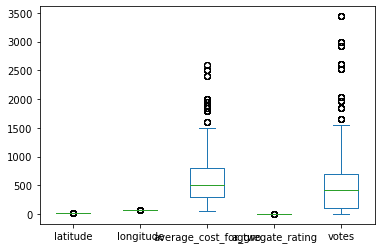

In [104]:
data.plot(kind='box', vert=True)

<AxesSubplot:ylabel='average_cost_for_two'>

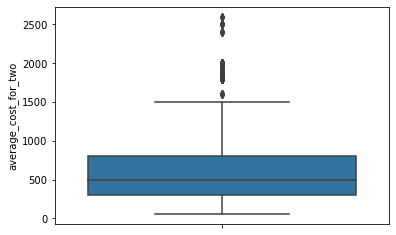

In [105]:
sns.boxplot(y=data["average_cost_for_two"])

In [106]:
Q1 = np.percentile(data['average_cost_for_two'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['average_cost_for_two'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['average_cost_for_two'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  500.0
Lower limit is -450.0
Upper Limit is 1550.0


In [107]:
outlier=[]
for x in data ['average_cost_for_two']:
    if ((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [108]:
ind1=data['average_cost_for_two']>upper_limit
data.loc[ind1].index

Int64Index([  15,   34,   48,  100,  101,  102,  103,  104,  105,  106,
            ...
            2814, 2816, 2817, 2842, 2843, 2845, 2846, 2847, 2848, 2849],
           dtype='int64', length=142)

In [109]:
index = data[(data['average_cost_for_two'] >= 1550)|(data['average_cost_for_two'] <= -450)].index
data.drop(index, inplace=True)

In [110]:
data.shape

(2709, 9)

<AxesSubplot:ylabel='average_cost_for_two'>

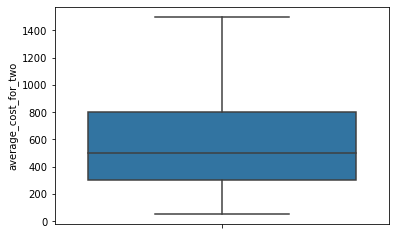

In [111]:
sns.boxplot(y=data["average_cost_for_two"])

<AxesSubplot:ylabel='aggregate_rating'>

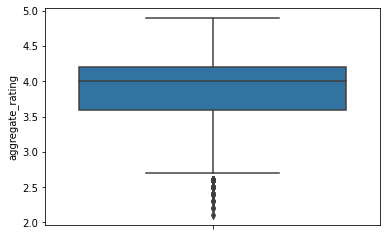

In [112]:
sns.boxplot(y=data["aggregate_rating"])

In [113]:
Q1 = np.percentile(data['aggregate_rating'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['aggregate_rating'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['aggregate_rating'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  0.6000000000000001
Lower limit is 2.7
Upper Limit is 5.1000000000000005


In [114]:
outlier=[]
for x in data ['aggregate_rating']:
    if ((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [115]:
index = data[(data['aggregate_rating'] >=5.1000000000000005 )|(data['aggregate_rating'] <= 2.7)].index
data.drop(index, inplace=True)

In [116]:
data.shape

(2602, 9)

<AxesSubplot:ylabel='aggregate_rating'>

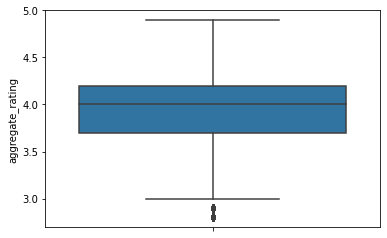

In [117]:
sns.boxplot(y=data["aggregate_rating"])

<AxesSubplot:ylabel='votes'>

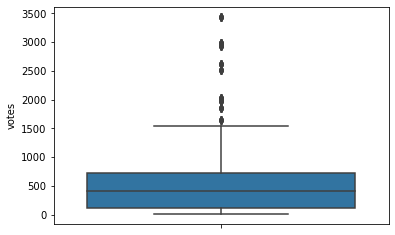

In [118]:
sns.boxplot(y=data["votes"])

In [119]:
Q1 = np.percentile(data['votes'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['votes'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['votes'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  610.0
Lower limit is -803.0
Upper Limit is 1637.0


In [120]:
outlier=[]
for x in data ['votes']:
    if ((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [121]:
index = data[(data['votes'] >=1649.5)|(data['votes'] <= -842.5)].index
data.drop(index, inplace=True)

<AxesSubplot:ylabel='votes'>

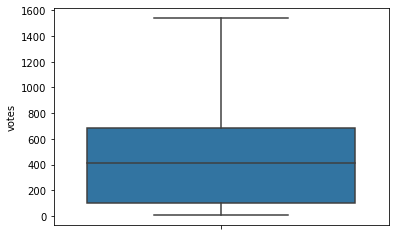

In [122]:
sns.boxplot(y=data["votes"])

data.rating_text.nunique()

data=pd.get_dummies(data)

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['rating_text']= label_encoder.fit_transform(data['rating_text'])

In [123]:
data

,name,locality,latitude,longitude,cuisines,average_cost_for_two,aggregate_rating,votes,rating_text
0,Namo Sandwich,Sudama Nagar,22.696331,75.834857,Fast Food,500,4.3,860,Very Good
1,Bake N Shake,"BCM Heights, Vijay Nagar",22.755705,75.895287,"Cafe, Fast Food, Bakery",500,4.2,683,Very Good
5,Shree Gurukripa,Vijay Nagar,22.753221,75.902148,North Indian,500,4.1,1451,Very Good
6,Hotel Guru Kripa Avenue,Sarwate Bus Stand,22.714094,75.869116,North Indian,350,4.1,1354,Very Good
7,Maa Ki Rasoi,Sudama Nagar,22.684658,75.828950,"North Indian, South Indian",450,4.1,541,Very Good
...,...,...,...,...,...,...,...,...,...
2839,Food Fantasy,Vijay Nagar,22.743870,75.896690,North Indian,600,3.8,69,Good
2840,SD 21 - Hotel Somdeep Palace,"Hotel Somdeep Palace, Vijay Nagar",22.750035,75.903482,"North Indian, Chinese",1100,4.6,959,Terbaik
2841,The Cube - Hotel Effotel,"Hotel Effotel, Vijay Nagar",22.750038,75.903475,"North Indian, Chinese, Italian",1200,4.8,518,Terbaik
2844,Little Italy,Vijay Nagar,22.762692,75.882301,"Italian, Mexican",1400,4.5,329,Excellent


# Scaling the Data

In [124]:
data = data.astype({'average_cost_for_two':'float', 'votes':'float'})
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
standardisation.fit_transform(data)
data

ValueError: could not convert string to float: 'Namo Sandwich'

print(scaler.fit_transform(data[['average_cost_for_two','aggregate_rating','votes']]))

In [126]:
data.head()

,name,locality,latitude,longitude,cuisines,average_cost_for_two,aggregate_rating,votes,rating_text
0,Namo Sandwich,Sudama Nagar,22.696331,75.834857,Fast Food,500.0,4.3,860.0,Very Good
1,Bake N Shake,"BCM Heights, Vijay Nagar",22.755705,75.895287,"Cafe, Fast Food, Bakery",500.0,4.2,683.0,Very Good
5,Shree Gurukripa,Vijay Nagar,22.753221,75.902148,North Indian,500.0,4.1,1451.0,Very Good
6,Hotel Guru Kripa Avenue,Sarwate Bus Stand,22.714094,75.869116,North Indian,350.0,4.1,1354.0,Very Good
7,Maa Ki Rasoi,Sudama Nagar,22.684658,75.828950,"North Indian, South Indian",450.0,4.1,541.0,Very Good


In [127]:
data.describe()

,latitude,longitude,average_cost_for_two,aggregate_rating,votes
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000
mean,22.724276,75.878673,600.824950,3.903179,441.894165
std,0.029449,0.030534,391.233859,0.458348,367.378360
min,22.598015,75.000000,50.000000,2.800000,4.000000
25%,22.713779,75.868415,300.000000,3.700000,99.000000
50%,22.725567,75.885655,500.000000,4.000000,409.000000
75%,22.749173,75.894840,800.000000,4.200000,681.000000
max,22.801616,75.938489,1500.000000,4.900000,1543.000000


In [128]:
type(data)

pandas.core.frame.DataFrame

# EDA

# Univariate and Bivariate Analysis

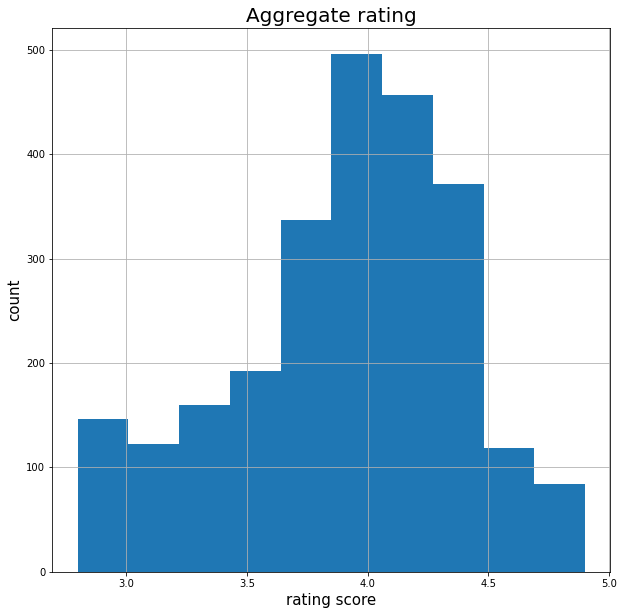

In [129]:
plt.figure(figsize=(10,10))
plt.hist(data['aggregate_rating'])
plt.title('Aggregate rating',fontsize=20)
plt.xlabel('rating score',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.grid()

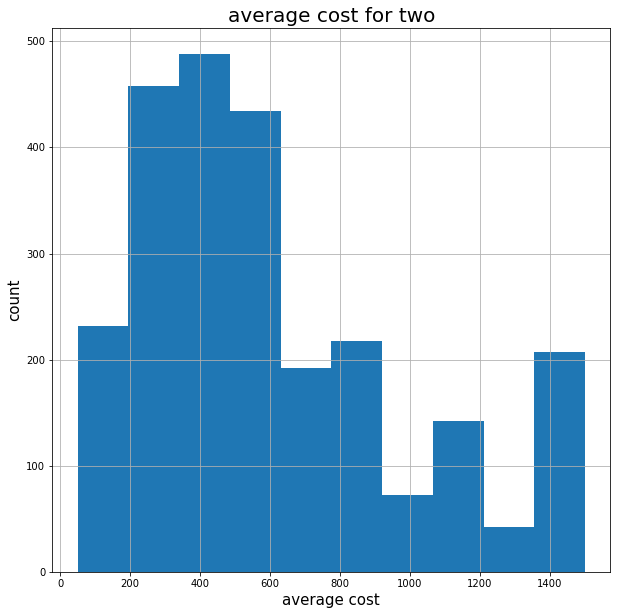

In [130]:
plt.figure(figsize=(10,10))
plt.hist(data['average_cost_for_two'])
plt.title('average cost for two',fontsize=20)
plt.xlabel('average cost',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.grid()

C:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


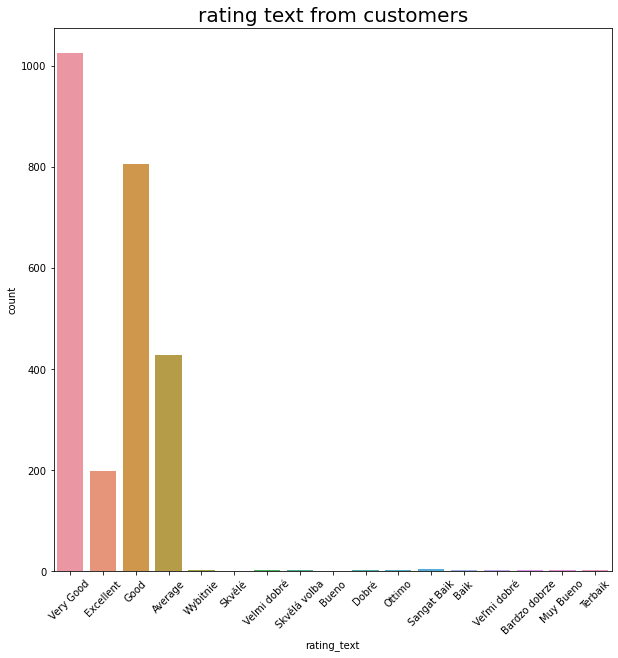

In [131]:
plt.figure(figsize=(10,10))
plt.title('rating text from customers',fontsize=20)
sns.countplot(data['rating_text'])
plt.xticks(rotation=45)
plt.show()

In [132]:
data.columns

Index(['name', 'locality', 'latitude', 'longitude', 'cuisines',
       'average_cost_for_two', 'aggregate_rating', 'votes', 'rating_text'],
      dtype='object')

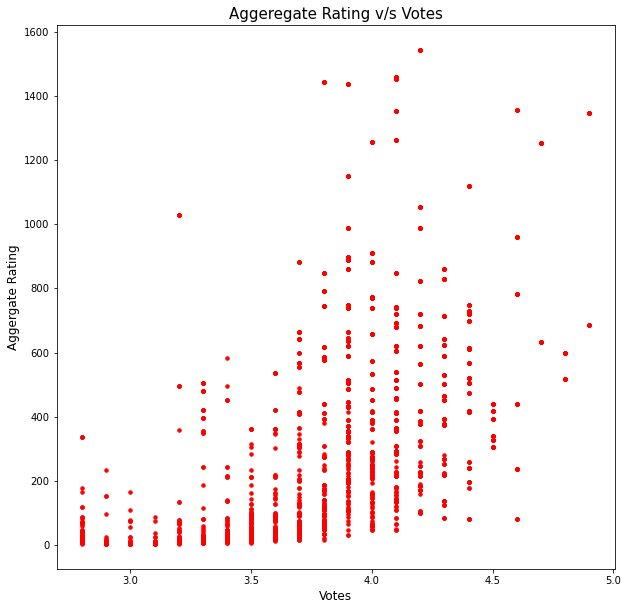

In [133]:
plt.figure(figsize=(10,10))
plt.scatter(data['aggregate_rating'],data['votes'],s=12,c='red')
plt.title('Aggeregate Rating v/s Votes',fontsize=15)
plt.xlabel('Votes',fontsize=12)
plt.ylabel('Aggergate Rating',fontsize=12)
plt.show()

# Modeling

# Linear Regression

In [134]:
data.columns

Index(['name', 'locality', 'latitude', 'longitude', 'cuisines',
       'average_cost_for_two', 'aggregate_rating', 'votes', 'rating_text'],
      dtype='object')

In [135]:
data = data.astype({'average_cost_for_two':'float', 'votes':'float'})

In [136]:
y=data['aggregate_rating']
x=data[['average_cost_for_two','votes']]

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [138]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)

In [139]:
from sklearn.metrics import mean_squared_error

In [140]:
mean_squared_error(y_test,y_predict)

0.13247430990040315

In [141]:
#we got approxmately 87% accuarcy for our model.

# Random forest

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [144]:
regressor.fit(x, y)

RandomForestRegressor(random_state=42)

In [145]:
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

# Fine Tuning

In [146]:
x = StandardScaler()
y = StandardScaler()

NameError: name 'StandardScaler' is not defined

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')

In [149]:
rft.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

In [150]:
y_pred=rft.predict(x_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'